In [1]:
import numpy as np

from sklearn.metrics import roc_auc_score 
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, GradientBoostingRegressor

# Data Processing

In [61]:
import pandas as pd

df = pd.read_csv("C:/Users/Jack/Desktop/Research/dataset/final data.csv")
df.tail()

,Country,2000 GDP,2001 GDP,2002 GDP,2003 GDP,2004 GDP,2005 GDP,2006 GDP,2007 GDP,2008 GDP,...,Industry (PJ),Residential (PJ),Transport (PJ),Other final consumption (PJ),Customs Score,Infrastructure Score,International Shipments Score,Logistics Competence and Quality Score,Timeliness Score,Tracking and Tracing Score
43,Switzerland,2.792160e+11,2.865830e+11,3.093010e+11,3.620750e+11,4.039130e+11,4.182850e+11,4.416350e+11,4.907410e+11,5.672680e+11,...,146,226,222,31,4.1,4.4,3.6,4.3,4.2,4.2
44,Thailand,1.263920e+11,1.202960e+11,1.343010e+11,1.522810e+11,1.728960e+11,1.893180e+11,2.217580e+11,2.629430e+11,2.913830e+11,...,1251,359,1042,1118,3.3,3.7,3.5,3.5,3.5,3.6
45,Ukraine,3.237508e+10,3.930958e+10,4.395616e+10,5.201036e+10,6.722015e+10,8.923887e+10,1.118850e+11,1.487340e+11,1.881100e+11,...,658,567,396,227,2.4,2.4,2.8,2.6,3.1,2.6
46,United Kingdom,1.665530e+12,1.649830e+12,1.785730e+12,2.054420e+12,2.421530e+12,2.543180e+12,2.708440e+12,3.090510e+12,2.929410e+12,...,901,1585,1516,327,3.5,3.7,3.5,3.7,3.7,4.0
47,United States,1.025100e+13,1.058190e+13,1.092910e+13,1.145650e+13,1.221720e+13,1.303920e+13,1.381560e+13,1.447420e+13,1.476990e+13,...,11634,11147,25280,7679,3.7,3.9,3.4,3.9,3.8,4.2


In [62]:
df.dtypes

Country                                    object
2000 GDP                                  float64
2001 GDP                                  float64
2002 GDP                                  float64
2003 GDP                                  float64
2004 GDP                                  float64
2005 GDP                                  float64
2006 GDP                                  float64
2007 GDP                                  float64
2008 GDP                                  float64
2009 GDP                                  float64
2010 GDP                                  float64
2011 GDP                                  float64
2012 GDP                                  float64
2013 GDP                                  float64
2014 GDP                                  float64
2015 GDP                                  float64
2016 GDP                                  float64
2017 GDP                                  float64
2018 GDP                                  float64


## Standardization

In [63]:
from sklearn.preprocessing import StandardScaler

# initialize each data category
energy_columns = ['Commercial & public services (PJ)', 'Industry (PJ)', 'Residential (PJ)', 'Transport (PJ)', 'Other final consumption (PJ)']

supply_chain_columns = ['Customs Score', 'Infrastructure Score', 'International Shipments Score', 'Logistics Competence and Quality Score', 
                        'Timeliness Score', 'Tracking and Tracing Score']

# Initialize StandardScaler for each data category
scaler_energy = StandardScaler()
scaler_supply_chain = StandardScaler()

# apply standardization to energy columns
df[energy_columns] = scaler_energy.fit_transform(df[energy_columns])

# apply standardization to supply chain columns
df[supply_chain_columns] = scaler_supply_chain.fit_transform(df[supply_chain_columns])

df.tail()

,Country,2000 GDP,2001 GDP,2002 GDP,2003 GDP,2004 GDP,2005 GDP,2006 GDP,2007 GDP,2008 GDP,...,Industry (PJ),Residential (PJ),Transport (PJ),Other final consumption (PJ),Customs Score,Infrastructure Score,International Shipments Score,Logistics Competence and Quality Score,Timeliness Score,Tracking and Tracing Score
43,Switzerland,2.792160e+11,2.865830e+11,3.093010e+11,3.620750e+11,4.039130e+11,4.182850e+11,4.416350e+11,4.907410e+11,5.672680e+11,...,-0.286714,-0.346559,-0.346125,-0.358791,1.526847,1.554441,0.686322,1.484705,1.327075,1.190785
44,Thailand,1.263920e+11,1.202960e+11,1.343010e+11,1.522810e+11,1.728960e+11,1.893180e+11,2.217580e+11,2.629430e+11,2.913830e+11,...,-0.127563,-0.299381,-0.144877,0.085945,-0.187507,0.176361,0.384089,-0.342624,-0.776214,-0.108253
45,Ukraine,3.237508e+10,3.930958e+10,4.395616e+10,5.201036e+10,6.722015e+10,8.923887e+10,1.118850e+11,1.487340e+11,1.881100e+11,...,-0.212972,-0.225598,-0.303421,-0.278599,-2.116156,-2.382929,-1.731547,-2.398369,-1.978093,-2.273317
46,United Kingdom,1.665530e+12,1.649830e+12,1.785730e+12,2.054420e+12,2.421530e+12,2.543180e+12,2.708440e+12,3.090510e+12,2.929410e+12,...,-0.177973,0.135512,-0.028546,-0.237685,0.241081,0.176361,0.384089,0.114208,-0.175274,0.757772
47,United States,1.025100e+13,1.058190e+13,1.092910e+13,1.145650e+13,1.221720e+13,1.303920e+13,1.381560e+13,1.447420e+13,1.476990e+13,...,1.367875,3.527395,5.803721,2.770317,0.669670,0.570098,0.081855,0.571040,0.125196,1.190785


# Feature Correlation Analysis

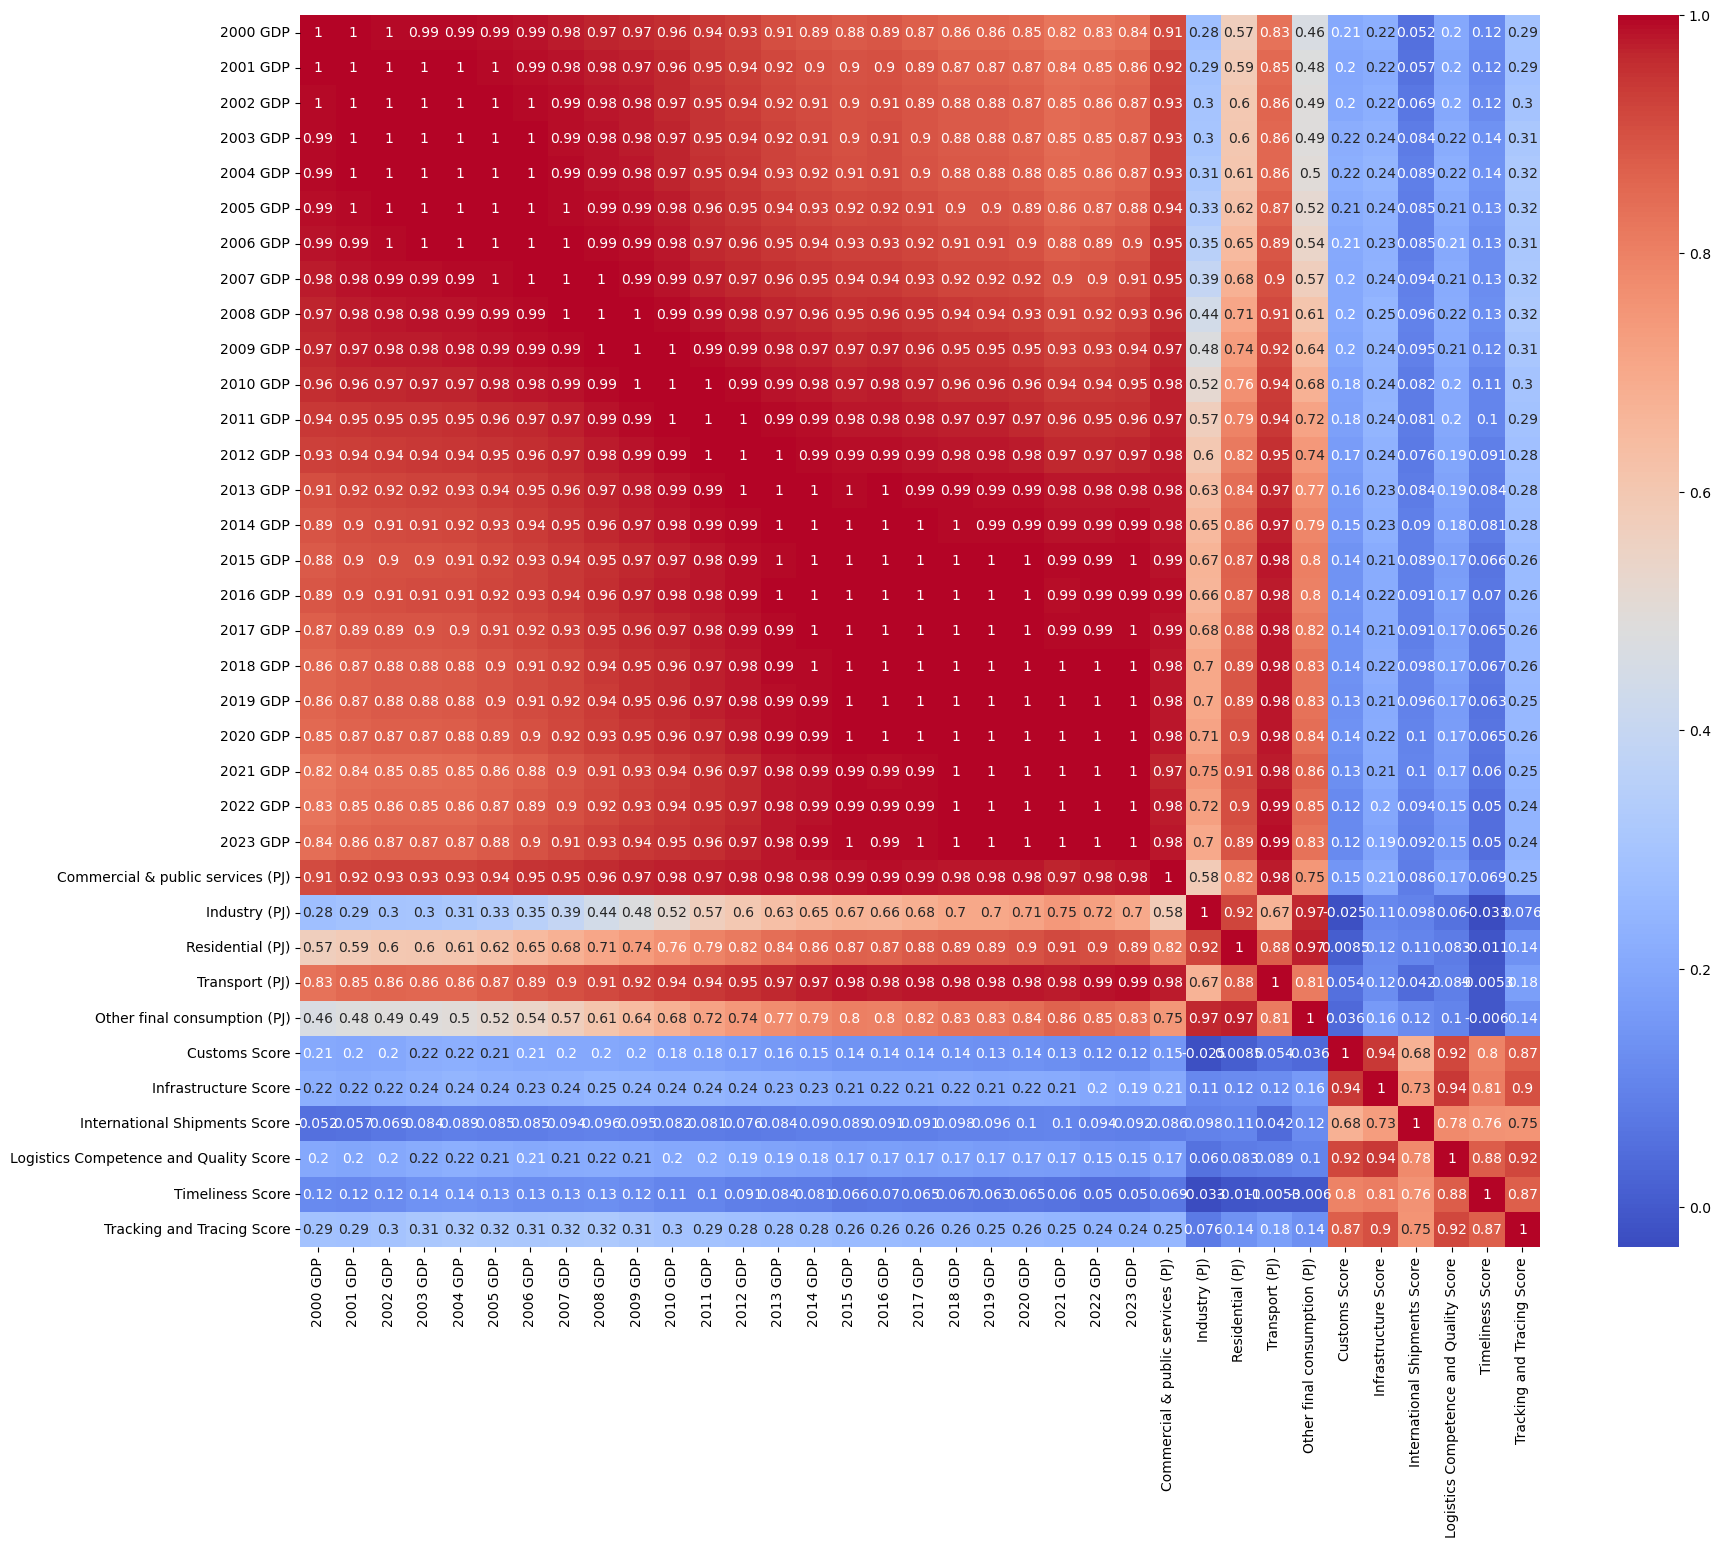

In [65]:
import seaborn as sb
import matplotlib.pyplot as plt

corr_exclude = ['Country']

corr_matrix = df.loc[:, ~df.columns.isin(corr_exclude)].corr()

plt.figure(figsize=(20, 16))

sb.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Model Building

## Random Forest Model

In [70]:
# define X to be the regressors / features & y = dependent variable 
X = df.drop(columns=['2023 GDP','Country'])  
y = df['2023 GDP']

In [71]:
# splitting our dataset into training and testing sets 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("The dimension of the training set, X_train is {}".format(X_train.shape))
print("The dimension of the testing set, X_test is {}".format(X_test.shape))

The dimension of the training set, X_train is (38, 34)
The dimension of the testing set, X_test is (10, 34)


In [72]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the RandomForestRegressor model to the training set 
rf_model.fit(X_train, y_train)

# initiate prediction on the testing set
y_pred = rf_model.predict(X_test)
y_pred

array([8.38613196e+10, 4.78121880e+11, 6.38965241e+10, 9.28670740e+11,
       6.27439280e+12, 4.59013750e+11, 6.00253267e+10, 3.49364300e+12,
       2.03887260e+12, 1.83051888e+12])

In [75]:
# extract the actual 2023 GDP for our testing set 
test_indices = X_test.index
actual_gdp_2023 = df.loc[test_indices, '2023 GDP']
test_countries = df.loc[test_indices, 'Country']

comaparison_df = pd.DataFrame({
    'Country': test_countries,
    'Predicted 2023 GDP' : y_pred,
    'Actual 2023 GDP' : actual_gdp_2023,
})

comaparison_df

,Country,Predicted 2023 GDP,Actual 2023 GDP
27,Lithuania,8.386132e+10,7.783640e+10
40,South Africa,4.781219e+11,3.777820e+11
26,Latvia,6.389652e+10,4.362708e+10
43,Switzerland,9.286707e+11,8.849400e+11
24,Japan,6.274393e+12,4.212950e+12
37,Singapore,4.590138e+11,5.014280e+11
12,Estonia,6.002533e+10,4.074485e+10
19,India,3.493643e+12,3.549920e+12
4,Brazil,2.038873e+12,2.173670e+12
25,Republic of Korea,1.830519e+12,1.712790e+12


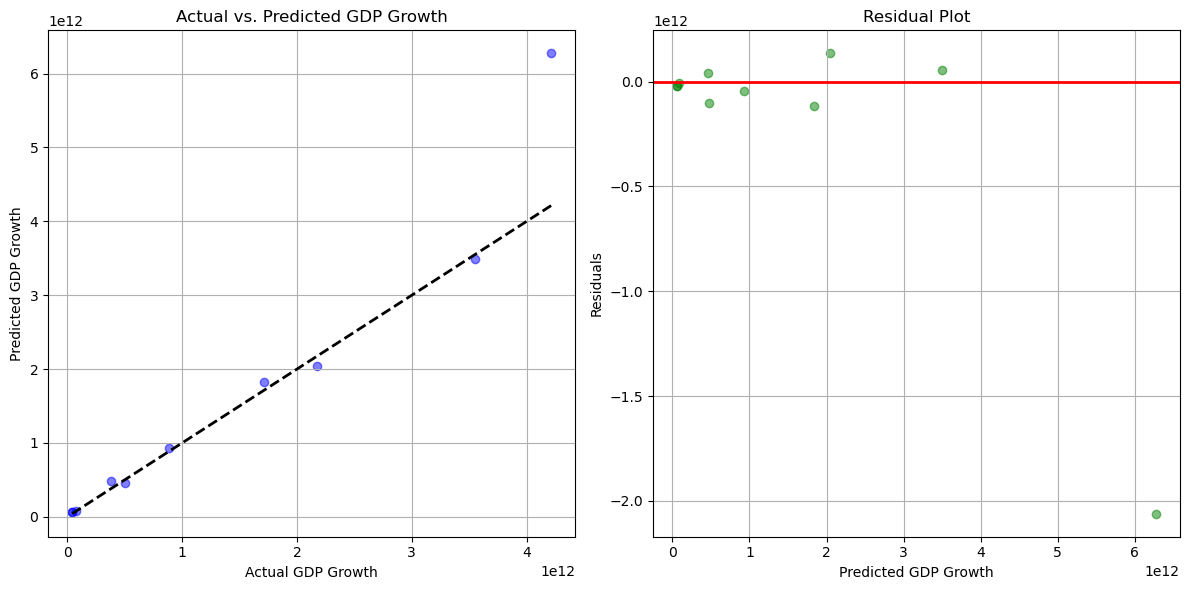

In [73]:
# Calculate residuals
residuals = y_test - y_pred

# Plotting actual vs. predicted values with residuals
plt.figure(figsize=(12, 6))

# actual vs predicted scatterplot 
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual GDP Growth')
plt.ylabel('Predicted GDP Growth')
plt.title('Actual vs. Predicted GDP Growth')
plt.grid(True)

# actual vs predicted residual plot  
plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-', linewidth=2)
plt.xlabel('Predicted GDP Growth')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)

plt.tight_layout()
plt.show()

## Model Evaluation

In [79]:
from sklearn.metrics import mean_squared_error, r2_score

scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores  # Since cross_val_score returns negative MSE
mean_mse = mse_scores.mean()
mse_scores, mean_mse

(array([5.86555260e+21, 2.81059689e+22, 7.43848255e+23, 6.74026676e+24,
        2.73968691e+25]),
 6.982991126708693e+24)

In [77]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(4.2993422713166966e+23, 0.7929657082729524)

In [78]:
1 - rf_model.score(X_test, y_test)

0.20703429172704757

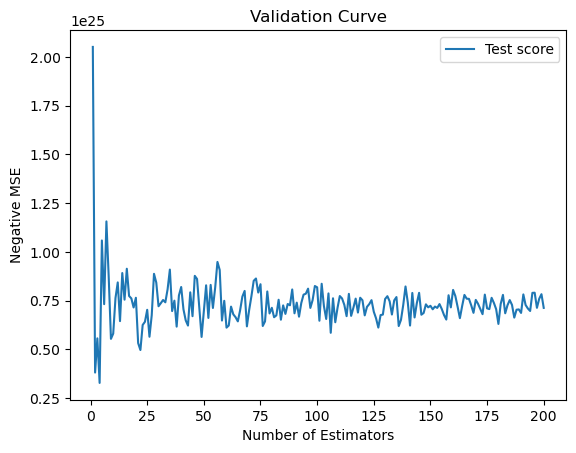

In [80]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

param_range = range(1, 201)
train_scores, test_scores = validation_curve(
    RandomForestRegressor(), X, y, param_name="n_estimators", param_range=param_range, cv=5, scoring="neg_mean_squared_error")

plt.plot(param_range, -test_scores.mean(axis=1), label='Test score')
plt.xlabel('Number of Estimators')
plt.ylabel('Negative MSE')
plt.title('Validation Curve')
plt.legend()
plt.show()

## Variable / Feature Importance 

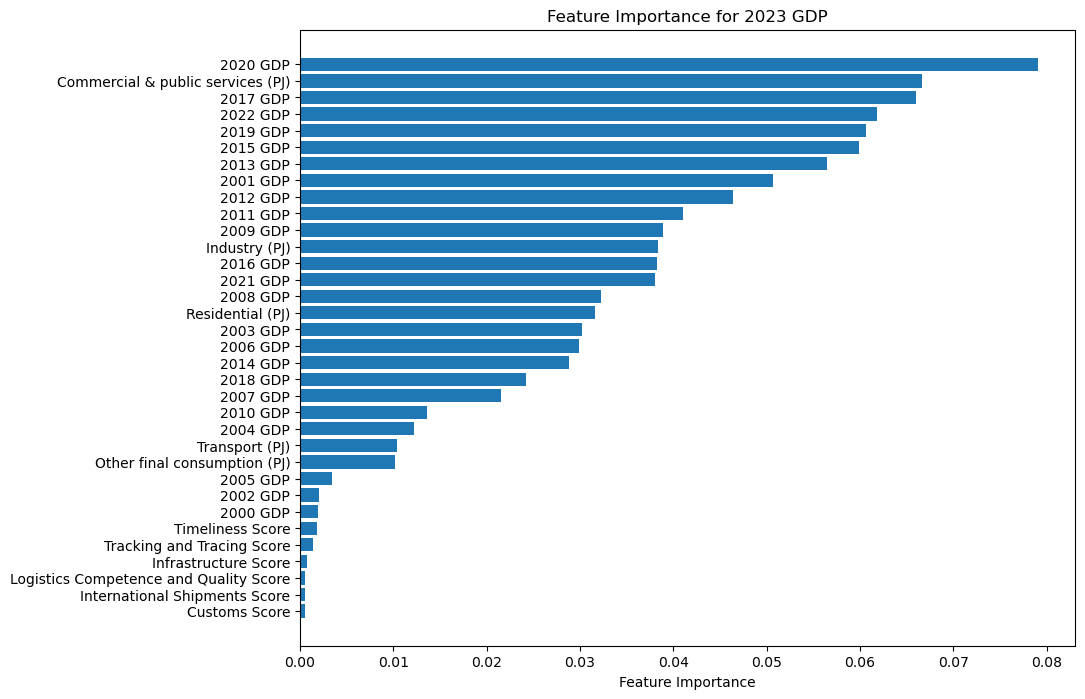

In [81]:
feature_importance = rf_model.feature_importances_
features = X.columns
sorted_idx = feature_importance.argsort()

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for 2023 GDP')
plt.show()

In [82]:
# Feature importance
feature_importances = rf_model.feature_importances_

feature_importances

array([0.0019381 , 0.050632  , 0.00201233, 0.03020082, 0.01217683,
       0.00344426, 0.02986609, 0.02152774, 0.03221991, 0.03886607,
       0.01362915, 0.04108449, 0.04639129, 0.0565143 , 0.02883245,
       0.05984963, 0.03821805, 0.06605514, 0.02417997, 0.06066337,
       0.07910339, 0.03803563, 0.06181623, 0.06664859, 0.03834752,
       0.03163788, 0.01035899, 0.01019869, 0.00048498, 0.00071632,
       0.00053035, 0.00053856, 0.00184582, 0.00143508])

## Tree Visualization

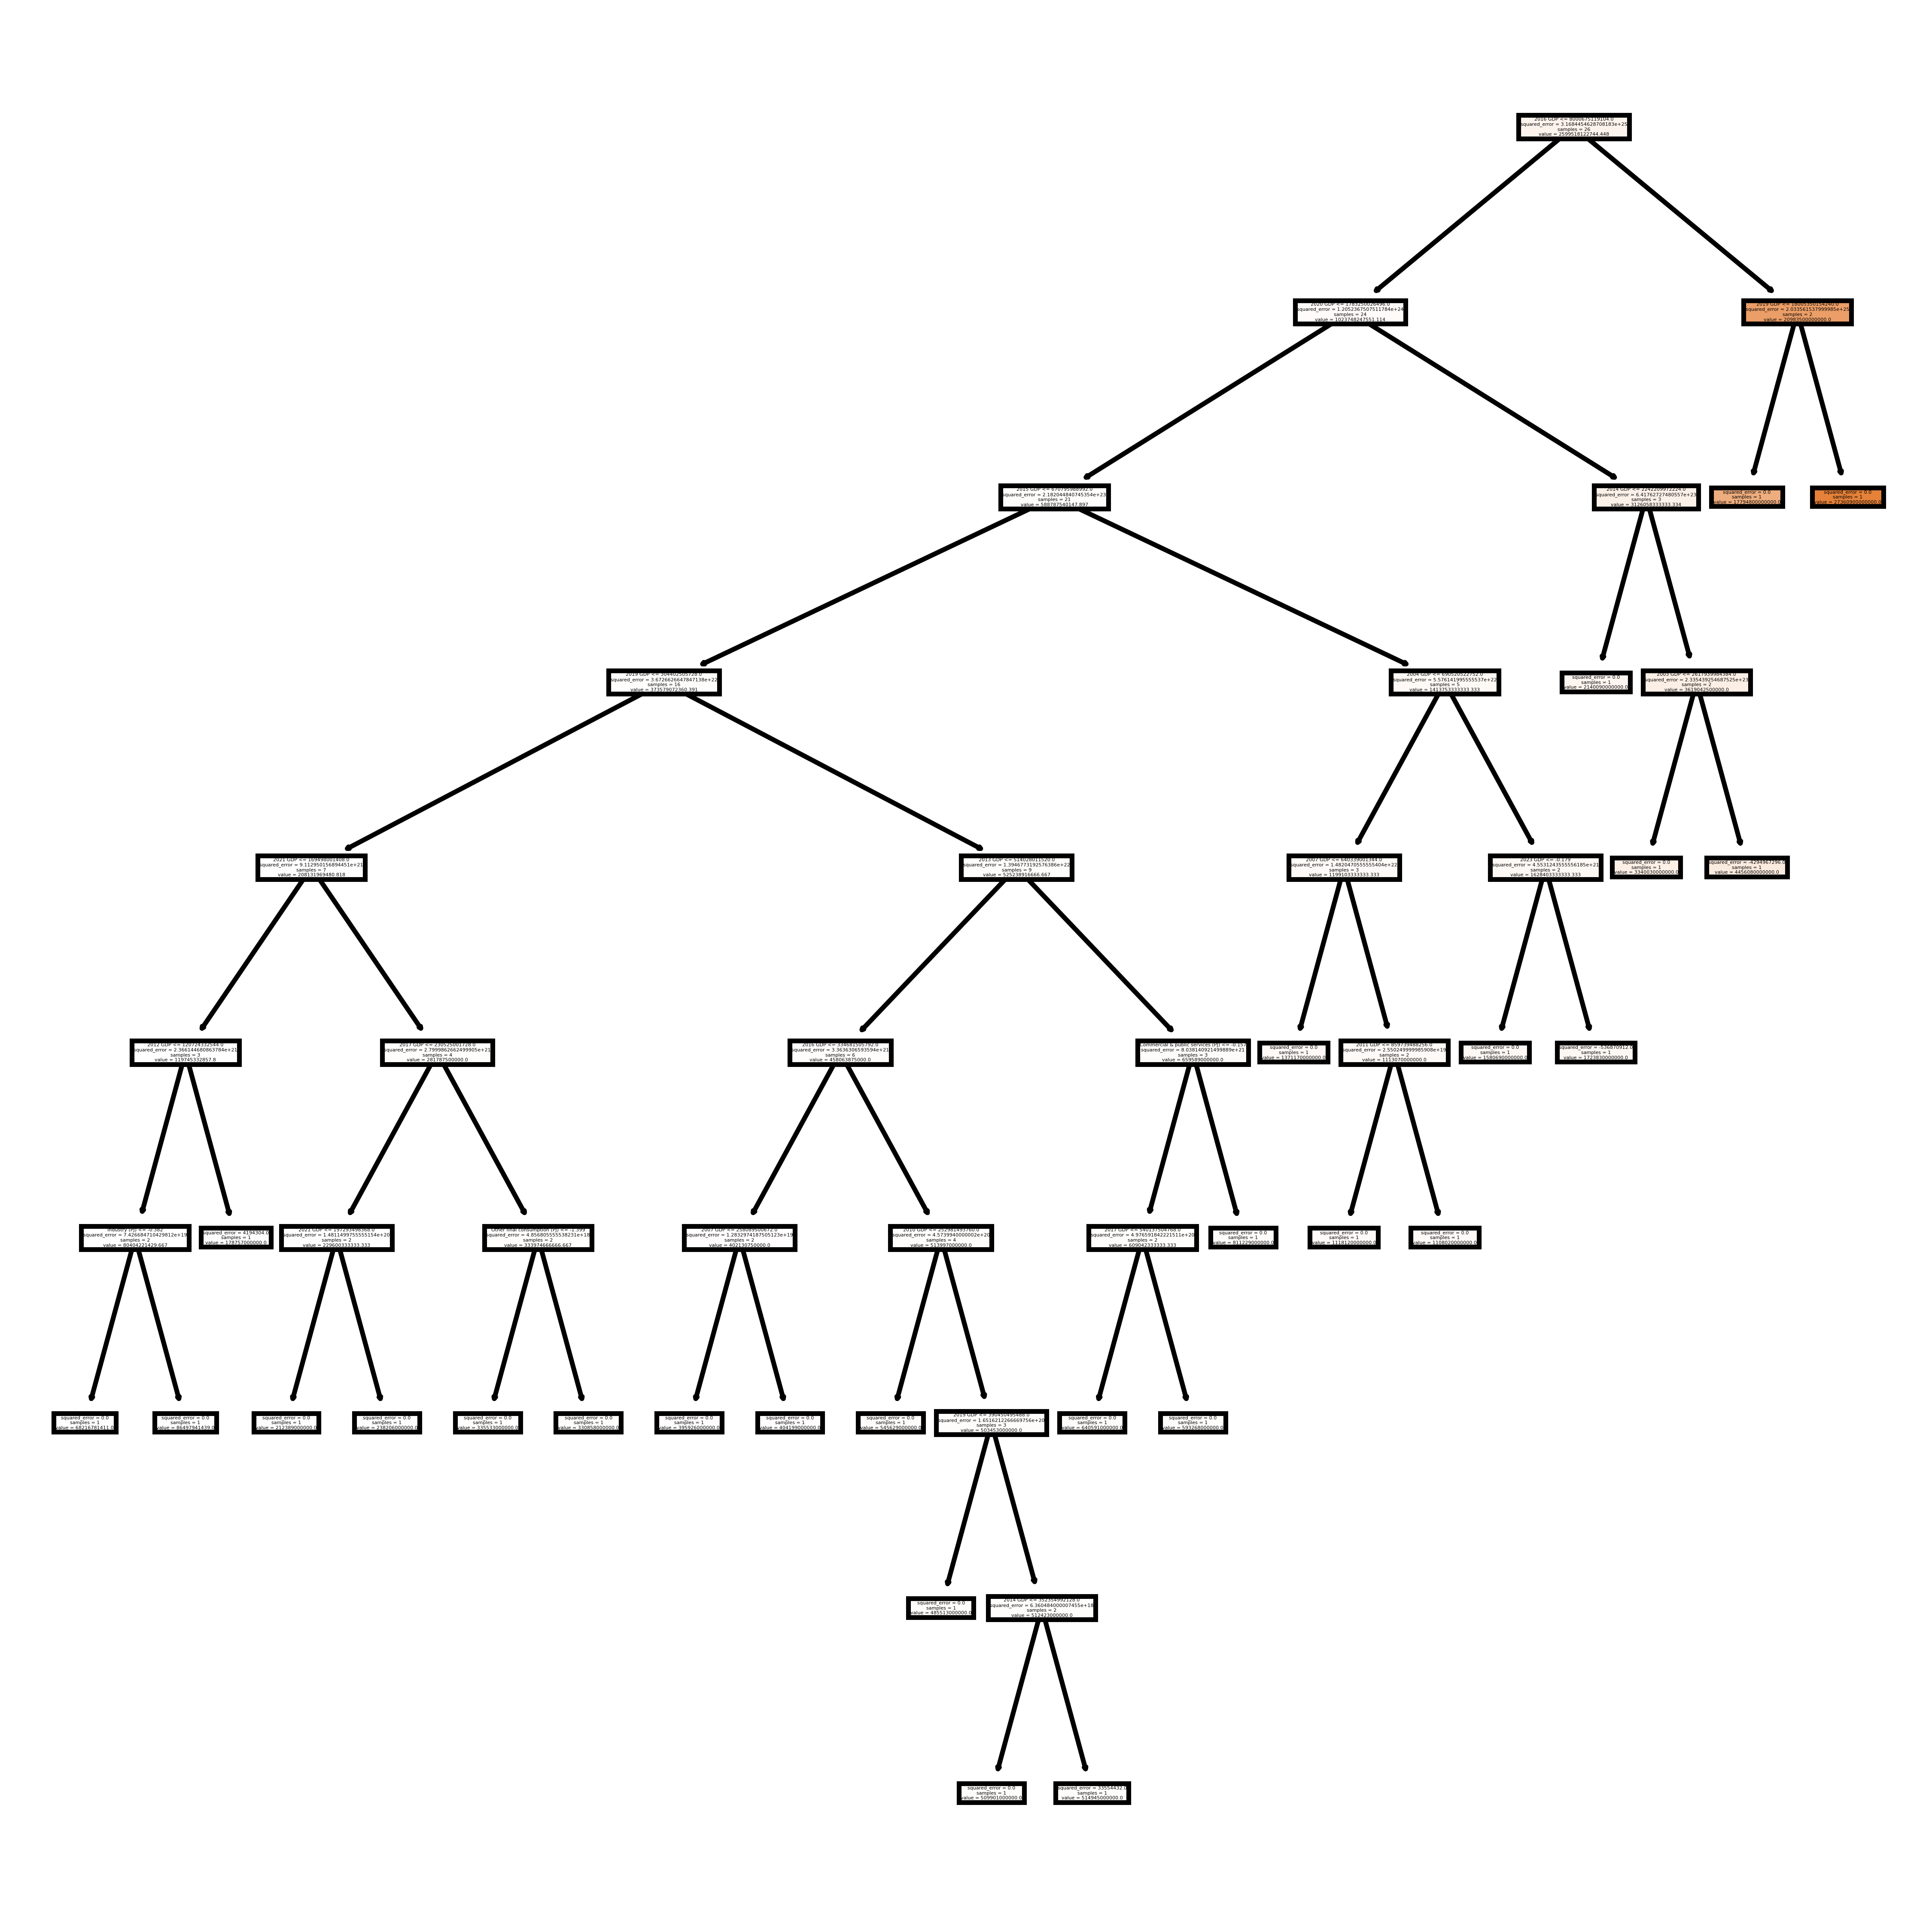

In [83]:
from sklearn import tree

fn=data.columns
cn=y
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (7,7), dpi=800)
tree.plot_tree(rf_model.estimators_[0], feature_names = fn, class_names=cn, filled = True);
fig.savefig('rf_individualtree.png')

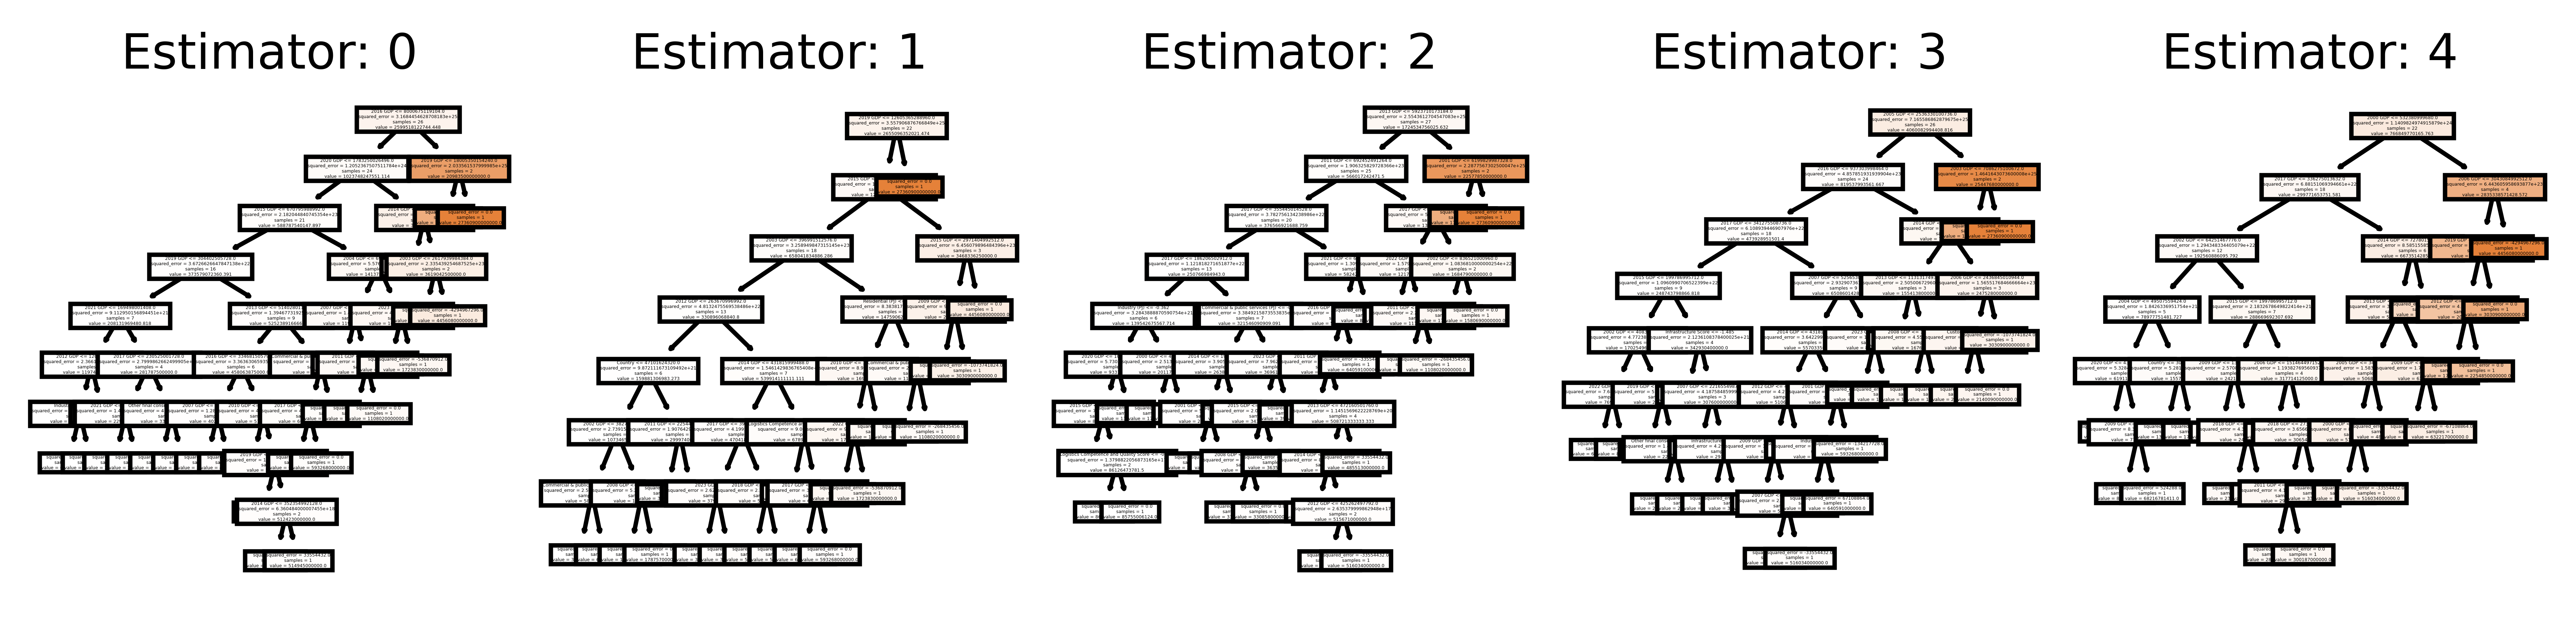

In [84]:
# This may not the best way to view each estimator as it is small
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)

for index in range(0, 5):
    
    tree.plot_tree(rf_model.estimators_[index], feature_names = fn, class_names=cn, filled = True, ax = axes[index]);
    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
    
fig.savefig('rf_5trees.png')